<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

#  K-Nearest Neighbors with `scikit-learn`

_Authors: Alex Sherman (DC)_

<a id="learning-objectives"></a>
## Learning Objectives

1. Utilize the KNN model on the iris data set.
2. Implement scikit-learn's KNN model.
3. Assess the fit of a KNN Model using scikit-learn.

### Lesson Guide
- [Learning Objectives](#learning-objectives)
- [Loading the Iris Data Set](#overview-of-the-iris-dataset)
	- [Terminology](#terminology)
- [Exercise: "Human Learning" With Iris Data](#exercise-human-learning-with-iris-data)
- [Human Learning on the Iris Data Set](#human-learning-on-the-iris-dataset)
- [K-Nearest Neighbors (KNN) Classification](#k-nearest-neighbors-knn-classification)
	- [Using the Train/Test Split Procedure (K=1)](#using-the-traintest-split-procedure-k)
- [Tuning a KNN Model](#tuning-a-knn-model)
	- [What Happens If We View the Accuracy of our Training Data?](#what-happen-if-we-view-the-accuracy-of-our-training-data)
	- [Training Error Versus Testing Error](#training-error-versus-testing-error)
- [Standardizing Features](#standardizing-features)
	- [Use `StandardScaler` to Standardize our Data](#use-standardscaler-to-standardize-our-data)
- [Comparing KNN With Other Models](#comparing-knn-with-other-models)

## Intro to Classification
___

- So far, we’ve worked primarily with regression problems.  We’ve focused on predicting a continuous set of values. That means we’ve been able to use distance to measure how accurate our prediction is.

- However, for other problems, we need to predict categorical responses, i.e **classes**. For example, an email is spam or isn’t spam. A loan will default or it won’t. 

>_**Exercise:**_
- Pair up and think of one problem in your field that can be solved using classification. With your partner discuss how many classes will you predict and what features can be used.

What if we want to build a model to predict a set of values, like the general photo color or the gender of a baby?
**Can we use regression for binary values?**
Do the same principles apply?

### What is Classification?

- Classification is a machine learning problem for predicting a category given the knowledge we have about that category.

- Many classification problems are trying to predict **binary** values. For example, we may be using patient data (medical history) to predict whether the patient is a smoker or not.

- **Binary classification**is the simplest form of classification.

- However, classification problems can have multiple classes, in this case it's called a **multiclass classification**. Instead of predicting whether an image shows a dog or a cat, you could predict whether it's a dog, a cat, a camel or a koala.

- Finally, sometimes our objects have several labels. Imagine you're looking at a picture of an item of clothing. Apart from classifying it into jeans, jacket, etc. you also want to predict its colour. This is an example of a **multiclass-multilabel** classification.

More definitions and the list of classifiers are [here](https://scikit-learn.org/stable/modules/multiclass.html)

![](./assets/classification-types.jpeg)

### Regression or Classification?

- One of the easiest ways to determine if a problem is regression or classification is to determine if our target variable _can be ordered mathematically_.

- For example, if predicting company revenue, $\$$100M is greater than $\$$90M.  This is a regression problem because the target can be ordered.

- However, when predicting if an image shows a _dog_ or a _cat_, _dog_ is not inherently greater than _cat_.  Therefore, this is a classification problem.

![](./assets/classification-vs-regression.jpeg)

##### Exercise: Review the following situations and decide if each one is a regression problem or a classification problem:

* Calculating the most common colour in a movie, predict if it's a comedy or a drama.
* Determine how many tickets will be sold to a concert given who is performing, where, and the date and time.
* Given the temperature over the last year by day, predict tomorrow's temperature outside.
* With customer data, determine if a user will return or not in the next 7 days to an e-commerce website.

### Classification models
In this lesson, we will get an intuitive and practical feel for the **k-Nearest Neighbors** model. kNN is a **non-parametric model**. So, the model is not represented as an equation with parameters/coefficients (e.g. the $\beta$ values in linear regression).

First, we will make a model by hand to classify iris flower data. Next, we will create a kNN model using `scikit-learn`.

> You may have heard of the clustering algorithm **k-Means Clustering**. These techniques have nothing in common, aside from both having a parameter k!

<a id="overview-of-the-iris-dataset"></a>
## Loading the Iris Data Set
---

![](assets/iris.jpeg)

##### Read the iris data into a pandas DataFrame, including column names.

In [20]:
# Read the iris data into a DataFrame.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display plots in-notebook
%matplotlib inline

plt.style.use('default')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

data = './data/iris.data'
iris = pd.read_csv(data)

In [2]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,Iris-setosa
63,6.1,2.9,4.7,1.4,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
88,5.6,3.0,4.1,1.3,Iris-versicolor
44,5.1,3.8,1.9,0.4,Iris-setosa


<a id="terminology"></a>
### Terminology

- **150 observations** (n=150): Each observation is one iris flower.
- **Four features** (p=4): sepal length, sepal width, petal length, and petal width.
- **Response**: One of three possible iris species (setosa, versicolor, or virginica)
- **Classification problem** because response is categorical.

<a id="exercise-human-learning-with-iris-data"></a>
## Guided Practice: "Human Learning" With Iris Data

**Question:** Can we predict the species of an iris using petal and sepal measurements? Together, we will:

1. Read the iris data into a Pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use sorting, split-apply-combine, and/or visualization to look for differences between species.
4. Write down a set of rules that could be used to predict species based on iris measurements.

**BONUS:** Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data and check the accuracy of your predictions.

### Gather some basic information about the data.

In [3]:
# 150 observations, 5 columns (the 4 features & response)
iris.shape

(150, 5)

In [4]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
# Verify the basic stats look appropriate
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Does the dataset contain imbalanced classes?
iris.species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [7]:
# Verify we are not missing any data
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

##### Use sorting, split-apply-combine, and/or visualization to look for differences between species.

In [8]:
# Sort the DataFrame by petal_width.
iris.sort_values(by='petal_width', ascending=True, inplace=True)

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa


In [10]:
# Display the NumPy array.
iris.values[0:5]

array([[5.2, 4.1, 1.5, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa']], dtype=object)

##### Split-apply-combine: Explore the data while using a `groupby` on `'species'`.

In [11]:
# Group by species and calculate the mean of sepal_length.
iris.groupby(by='species', axis=0).sepal_length.mean()

species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64

In [12]:
# Group by species and calculate the mean of all numeric variables.
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


##### What feature would you use to distinguish the classes? Create box plots showing distributions of all features, grouped by species.

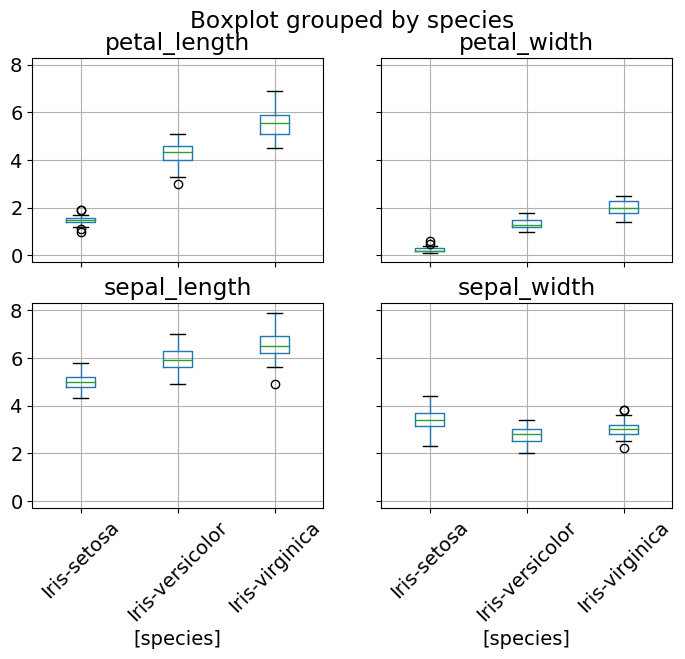

In [21]:
# Box plot of all numeric columns, grouped by species
# A:



iris.boxplot(by='species', rot=45);

In [22]:
# Map species to a numeric value so that plots can be colored by species.
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Alternative method:
iris['species_num'] = iris.species.factorize()[0]

In [23]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


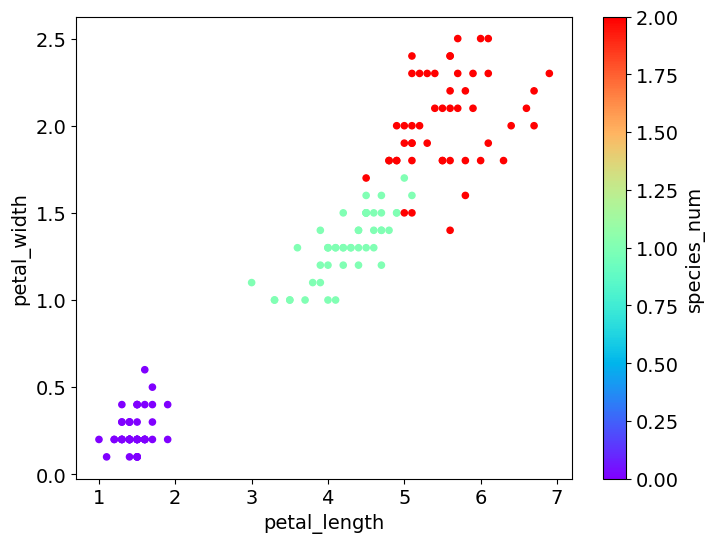

In [24]:
# Scatterplot of petal_length vs. petal_width, colored by species
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='rainbow');

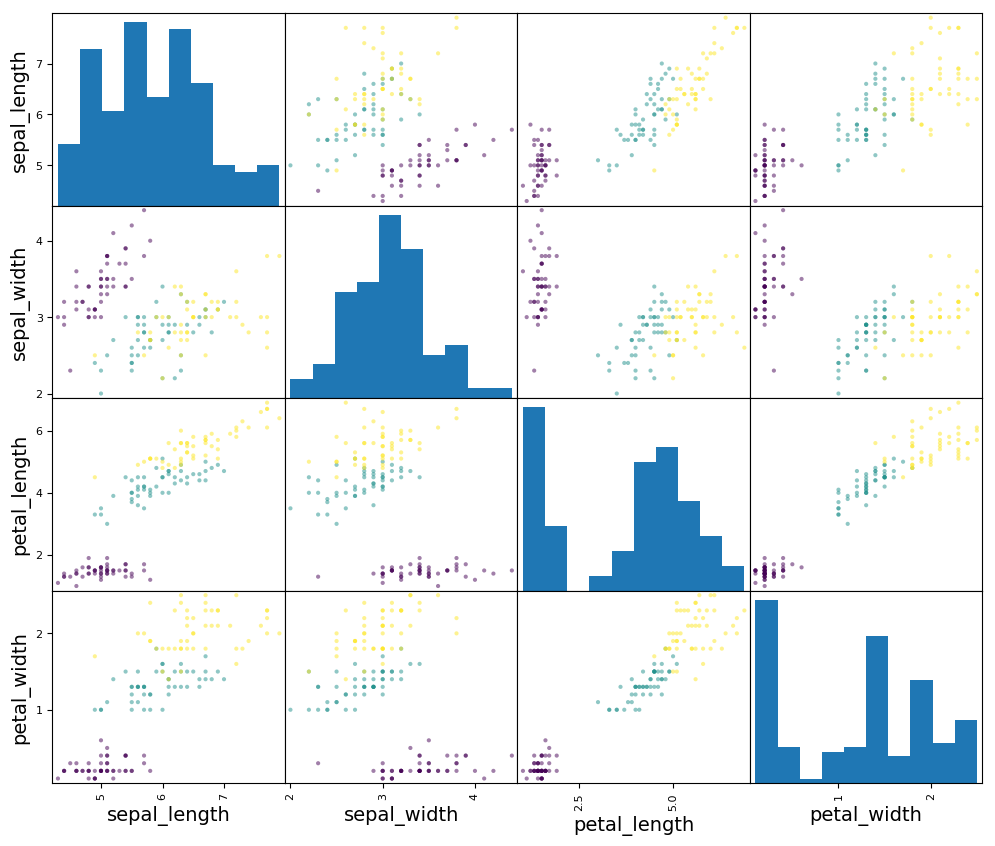

In [25]:
# Scatter matrix of all features, colored by species.
pd.plotting.scatter_matrix(iris.drop('species_num', axis=1), c=iris.species_num, figsize=(12, 10));

### Class Exercise: Using the graphs above, can you write down a set of rules that can accurately predict species based on iris measurements?

In [18]:
# Feel free to do more analysis if needed and use feature engineering to make good rules!

##### Bonus: If you have time during the class break or after class, try to implement these rules to make your own classifier!

Write a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data and check the accuracy of your predictions.

In [33]:
def predict_flower(df):
    preds = []
    for ind, row in df.iterrows():  
        
        # Write down your rules to predict iris species
        
        
        
        pred.append(prediction)
    
    df['prediction'] = pred   # add a column with the predictions to the DataFrame 
    
    
predict_flower(iris)

AttributeError: 'Series' object has no attribute 'petal_area'

In [34]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
# Let's see what percentage your manual classifier gets correct!
# 0.3333 means 1/3 are classified correctly

sum(iris.species == iris.prediction) / 150.

<a id="human-learning-on-the-iris-dataset"></a>
## Human Learning on the Iris Data Set
---

How did we (as humans) predict the species of an iris?

1. We observed that the different species had (somewhat) dissimilar measurements.
2. We focused on features that seemed to correlate with the response.
3. We created a set of rules (using those features) to predict the species of an unknown iris.

We assumed that if an **unknown iris** had measurements similar to **previous irises**, then its species was most likely the same as those previous irises.

In [26]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

# Create a custom color map.
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [27]:
# Map each iris species to a number.
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

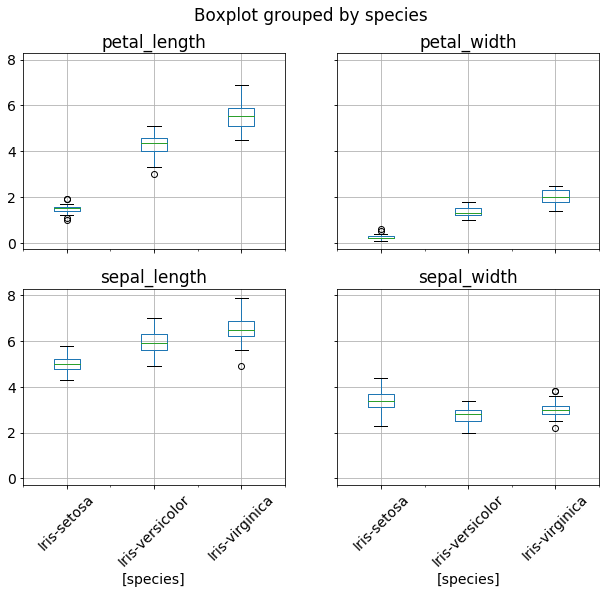

In [28]:
# Box plot of all numeric columns, grouped by species.
iris.drop('species_num', axis=1).boxplot(by='species', rot=45);

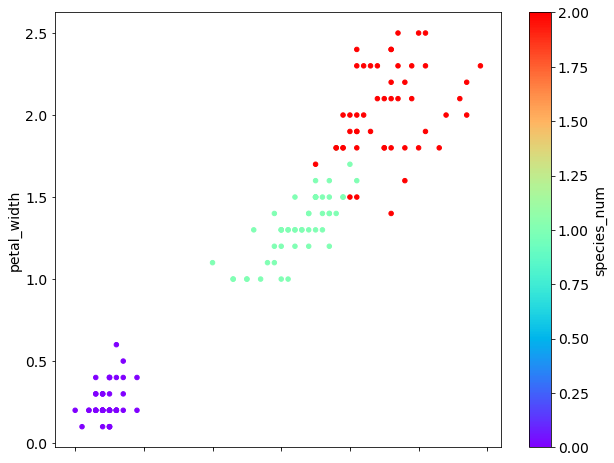

In [29]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES.
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='rainbow');

In [30]:
iris['pred_num'] = iris.prediction.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})



# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by PREDICTION.
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='pred_num', colormap='rainbow');

AttributeError: 'DataFrame' object has no attribute 'prediction'

---

<a id="k-nearest-neighbors-knn-classification"></a>
## K-Nearest Neighbors (KNN) Classification
---

K-nearest neighbors classification is (as its name implies) a classification model that uses the $k$ most similar i.e. nearest observations in order to make a prediction.

**KNN is a supervised learning method**; therefore, the training data must have known labels.

The process of prediction using KNN is fairly straightforward:

1. Pick a value for $k$.
2. For a given point, calculate the distance to all other points.
3. Given those distances, pick the k closest points.
    - Euclidian distance is often used as the distance metric, but other metrics are allowed.
4. Use the most popular response value from the $k$ "nearest neighbors" as the predicted response value for the new observation.

![](./assets/knn.jpeg)

### Intuition behind KNN

* Suppose we want to determine your favorite type of music.  How might we determine this without directly asking you?

* Generally, friends share similar traits and interests (e.g. music, sports teams, hobbies, etc).  We could ask your five closest friends what their favorite type of music is and take the majority vote.

* This is the idea behind KNN:  we look for things similar to (or close to) our new observation and identify shared traits.  We can use this information to make an educated guess about a trait of our new observation.


_How about this class on Data Science? Same logic applies!_

### KNN Classification Map for Iris
The visualizations below show how a given area can change in its prediction as $k$ changes.

- Colored points represent true values and colored areas represent a **prediction space**. (This is called a Voronoi Diagram.)
- Each prediction space is where the majority of the $k$ nearest points are the color of the space.
- To predict the class of a new point, we guess the class corresponding to the color of the space it lies in.

<a id="knn-classification-map-for-iris-k"></a>
##### k=1

![1NN classification map](./assets/iris_01nn_map.png)

##### k=5

![5NN classification map](./assets/iris_05nn_map.png)

##### k=15
![15NN classification map](./assets/iris_15nn_map.png)

##### k=50

![50NN classification map](./assets/iris_50nn_map.png)

We can see that, as $k$ increases, the borders of the classification spaces become more distinct and smooth. However, you can also see that the spaces are not perfectly pure when it comes to the known elements within them.

**How are outliers affected by $k$?** As $k$ increases, outliers are "smoothed out". Look at the above three plots and notice how blue outliers strongly affect the prediction space when $k=1$. When $k=50$, outliers no longer affect region boundaries. 
* This is a classic bias-variance tradeoff -- with increasing $k$, the **bias increases** but the **variance decreases**.

> **Question:** What's the "best" value for $k$ in this case?

### Predicitng best position for an NBA player

For the rest of the lesson, we will be using a dataset containing the 2015 season statistics for ~500 NBA players. This dataset leads to a nice choice of $k$, as we'll see below. The columns we'll use for features (and the target 'pos') are:


| Column | Meaning |
| ---    | ---     |
| pos | C: Center. F: Front. G: Guard |
| ast | Assists per game | 
| stl | Steals per game | 
| blk | Blocks per game |
| tov | Turnovers per game | 
| pf  | Personal fouls per game | 

For information about the other columns, see [this glossary](https://www.basketball-reference.com/about/glossary.html).

In [31]:
# Read the NBA data into a DataFrame.
import pandas as pd

path = './data/NBA_players_2015.csv'
nba = pd.read_csv(path, index_col=0)
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg_,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
season_end,,,,,,,,,,,,,,,,,,,,,
2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,0.469,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,0.474,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,0.550,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6
2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,0.432,...,12.9,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0
2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,0.426,...,10.9,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2


In [32]:
# To use scikit-learn we need to provide numeric values. Map positions to numbers.
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [178]:
# We will only consider the numbers of assists, blocks, steals, turnovers and personal fouls per game.
# Create feature matrix X. 
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]
# Create response vector y.
y = nba.pos_num

### Classification metrics

Metrics for regression, like the MSE, **do not apply** to classification.

Instead there are a few metrics that we can use to calculate the number of correct predictions and errors.

The most common is **accuracy** which is the number of *correct* predictions out of *all* predictions in the sample. This is a value we want to maximize. However, accuracy is not reliable when calculated on imbalanced data.

<a id="using-the-traintest-split-procedure-k"></a>
### Using the Train/Test Split Procedure (k=1)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

##### Step 1: Split X and y into training and testing sets (using `random_state` for reproducibility).

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

##### Step 2: Train the model on the training set (using k=1).

In [180]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

##### Step 3: Test the model on the testing set and check the accuracy.

In [181]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.6166666666666667


> **Question:** If we had trained and tested on the same dataset (X_train), using 1-KNN what accuracy would we likely get?

In [43]:
y_pred_class = knn.predict(X_train)
print((metrics.accuracy_score(y_train, y_pred_class)))

1.0


##### Repeating for k=50.

In [44]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.675


>**Question:** Suppose we again train and test on the same dataset (X_train), but using 50-KNN. Would we expect the accuracy to be higher, lower, or the same as compared to 1-KNN?

In [45]:
y_pred_class = knn.predict(X_train)
print((metrics.accuracy_score(y_train, y_pred_class)))

0.6452513966480447


### Comparing Testing Accuracy With Null Accuracy

Null accuracy is the accuracy that can be achieved by **always predicting the most frequent class**. For example, if most people are healthy we would always predict healthy. The disadvantages of such an approach are quite obvious however we can use it as a benchmark against which we can compare more complicated classification models.

In our example, if most players in our data set are Centers, we would always predict Center.


##### Examine the class distribution from the training set.

Remember that we are comparing KNN to this simpler model. So, we must find the most frequent class **of the training set**.

In [46]:
print(y_train.value_counts())

most_freq_class = y_train.value_counts().index[0]
print("Most frequent class:", most_freq_class)

1    150
2    140
0     68
Name: pos_num, dtype: int64
Most frequent class: 1


##### Compute null accuracy.

In [47]:
n_centre = y_test.value_counts()[most_freq_class]
null_acc = n_centre / len(y_test)
null_acc

0.4083333333333333

<a id="tuning-a-knn-model"></a>
## Tuning a KNN Model
---

<a id="what-happen-if-we-view-the-accuracy-of-our-training-data"></a>
### What Happens If We View the Accuracy of our Training Data?

In [182]:
scores = []
for k in range(1,100):
    # Instantiate the model 
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the model
    knn.fit(X_train, y_train)
    # Make predicctions
    y_pred_class  = knn.predict(X_train)
    # Store predictions
    score = metrics.accuracy_score(y_train, y_pred_class)
    scores.append([k, score])

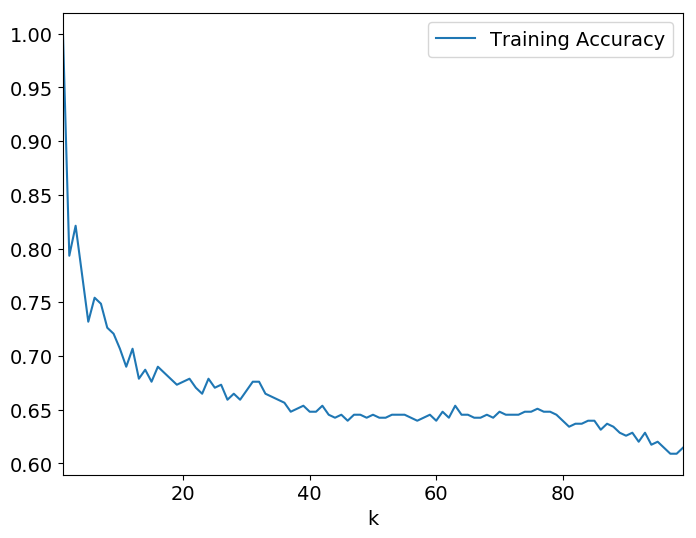

In [183]:
data = pd.DataFrame(scores, columns=['k','Training Accuracy'])
data.plot.line(x='k',y='Training Accuracy');

> **Question:** As k increases, why does the accuracy fall?

##### How to choose the best k? 

In [209]:
# Calculate TRAINING ERROR and TESTING ERROR for k=1 through 100.
# ERROR = 1 - ACCURACY

k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find training and test accuracy for all values of k between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 72, n_neighbors = 73

In [190]:
# Create a DataFrame of k, training error, and testing error.
training_error, testing_error = choose_k(X_train, X_test, y_train, y_test)
column_dict = {'k': k_range, 
               'Training error' : training_error, 
               'Testing error' : testing_error}

errors = pd.DataFrame(column_dict).set_index('k').sort_index(ascending=False)
errors.head()

,Training error,Testing error
k,,
100,0.388268,0.366667
99,0.385475,0.358333
98,0.391061,0.366667
97,0.391061,0.366667
96,0.385475,0.366667


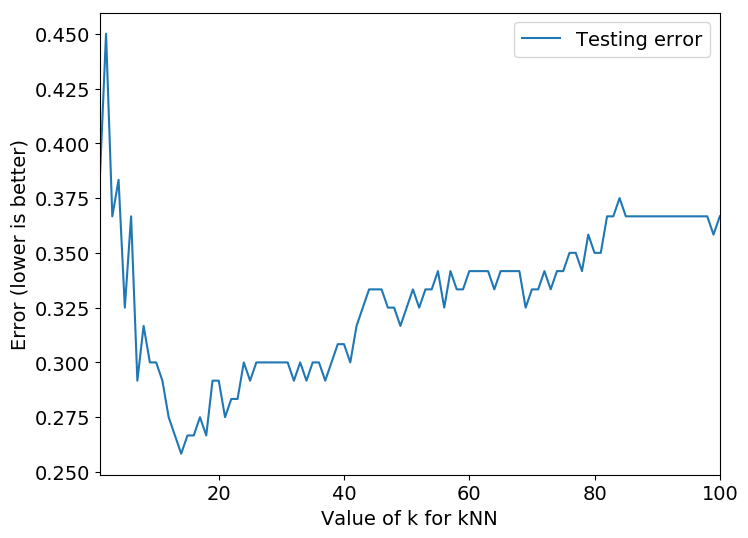

In [191]:
# Plot the relationship between K and TESTING ERROR.
errors.plot(y='Testing error');
plt.xlabel('Value of k for kNN');
plt.ylabel('Error (lower is better)');

In [63]:
# Find the minimum testing error and the associated K value.
errors.sort_values('Testing error').head()

,Training error,Testing error
k,,
14,0.312849,0.258333
13,0.321229,0.266667
18,0.321229,0.266667
16,0.310056,0.266667
15,0.324022,0.266667


In [64]:
# Alternative method:
min(list(zip(testing_error, k_range)))

(0.2583333333333333, 14)

<a id="training-error-versus-testing-error"></a>
### Training Error Versus Testing Error

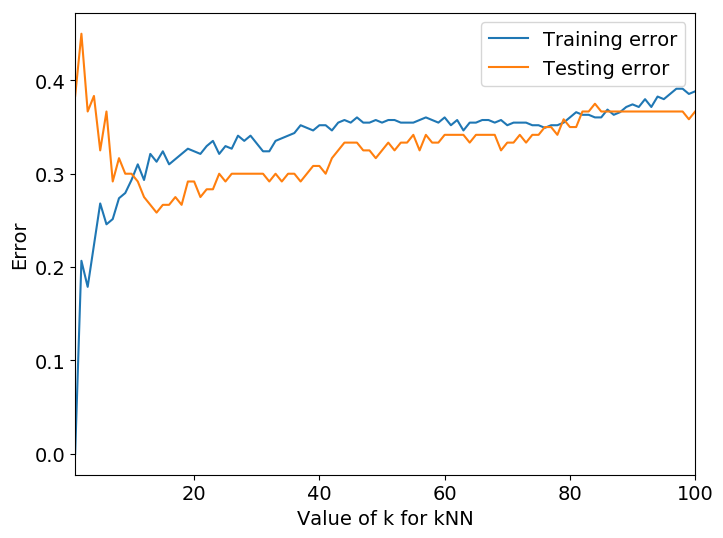

In [69]:
# Plot the relationship between K and both TRAINING ERROR and TESTING ERROR.
errors.plot();
plt.xlabel('Value of k for kNN');
plt.ylabel('Error');

- **Training error** increases as model complexity decreases (higher value of K).
- **Testing error** is minimized at the optimum model complexity.

Evaluating the training and testing error is important. For example:

- If the training error is much lower than the testing error, then our model is likely overfitting. 
- If the testing error starts increasing as we vary a hyperparameter, we may be overfitting.
- If either error plateaus, our model is likely underfitting (not complex enough).

##### What could we conclude?

- When using kNN on this data set with these features, the **best value for $k$** is likely to be around 14.
- Given the statistics of an **unknown player**, we estimate that we would be able to correctly predict his position about 74% of the time.

##### Making Predictions on Out-of-Sample Data

Given the statistics of a (truly) unknown NBA player, how do we predict his position?

In [71]:
import numpy as np

# Instantiate the model with the best-known parameters.
knn = KNeighborsClassifier(n_neighbors=14)

# Re-train the model with X and y (not X_train and y_train). Why?
knn.fit(X, y)

# Make a prediction for an out-of-sample observation.
knn.predict(np.array([2, 1, 0, 1, 2]).reshape(1, -1))

array([2])

<a id="standardizing-features"></a>
## Standardising Features
---

There is one major issue that applies to many machine learning models: They are sensitive to feature scale. 

> KNN in particular is sensitive to feature scale because it (by default) uses the Euclidean distance metric. To determine closeness, Euclidean distance sums the square difference along each axis. So, if one axis has large differences and another has small differences, the former axis will contribute much more to the distance than the latter axis.

This means that it matters whether our feature are centered around zero and have similar variance to each other.

Unfortunately, most data does not naturally start at a mean of zero and a shared variance. Other models tend to struggle with scale as well, even linear regression, when you get into more advanced methods such as regularization.

Fortuantely, this is an easy fix.

<a id="use-standardscaler-to-standardize-our-data"></a>
### Use `StandardScaler` to Standardise our Data

StandardScaler standardises our data by subtracting the mean from each feature and dividing by its standard deviation.

##### Separate feature matrix and response for scikit-learn.

In [130]:
# Create feature matrix (X).
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']

X = nba[feature_cols]
y = nba.pos_num  # Create response vector (y).

##### Create the train/test split.

**Important:** we always create the train/test split first. This is because we are trying not to leak ANY information from our test set so that our ML model doesn't learn from it. Otherwise will reveal information about our testing data if we standardise right away.

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [132]:
# Let's look at the mean and standard deviation of the first variable in both training and test sets.
print("Training set: mean = {}, std = {}".format("%.3f" % X_train.ast.mean(), "%.3f" % X_train.ast.std()))
print("Test set: mean = {}, std = {}".format("%.3f" % X_test.ast.mean(), "%.3f" % X_test.ast.std()))

Training set: mean = 1.778, std = 1.783
Test set: mean = 1.812, std = 1.752


##### Instantiate and fit `StandardScaler`.
In `scikit-learn`
- `.fit()` calculates the transformation,
- `.transform()` applies it to the data,
- `.fit_transform()` combines the two methods above. It first calculates the transformation and then applies it to the data.

We need to standardise all the data, however, we don't want to learn anything from the test data, what do we do? Solution: calculate the mean and standard deviation of the training set and use these values to transform both training and testing data.

In [133]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
scaler.mean_, scaler.scale_

(array([1.77821229, 0.6452514 , 0.41648045, 1.14273743, 1.7377095 ]),
 array([1.78083376, 0.43865885, 0.47464413, 0.77361539, 0.72381848]))

In [135]:
print("Scaled training set: mean = {}, std = {}".format("%.3f" % X_train[:,0].mean(), 
                                                        "%.3f" % X_train[:,0].std()))
print("Scaled test set: mean = {}, std = {}".format("%.3f" % X_test[:,0].mean(), 
                                                     "%.3f" % X_test[:,0].std()))

Scaled training set: mean = 0.000, std = 1.000
Scaled test set: mean = 0.019, std = 0.980


**Exercise:** 

Fit a kNN model using the scaled data and look at the testing error. Is the optimal number of neighbours still the same? Can we improve our results from before?

In [136]:
# A:

0.30833333333333335


## Binary classification metrics
___
### Confusion matrix
A **confusion matrix** is often used to evaluate the performance of a classifier and shows both the correct predictions and the errors.

![](./assets/confusion-matrix.jpeg)

Check out the extended version of a confusion matrix on [Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)

### ROC curve

**ROC curve** is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

To draw a ROC curve we use True Positive Rate (TPR) and False Positive Rate (FPR). The TPR defines how many correct positive predictions occur among all positive samples. FPR, on the other hand, defines how many negative samples were incorrectly predicted as positive.

![](./assets/ROC curve.jpeg)

**Important:** ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets. In both cases the area under the curve (AUC) can be used as a summary of the model performance.

[Cities in Australia](https://www.kaggle.com/koki25ando/city-list-of-australia) dataset

In [192]:
data = './data/AUS_state.csv'
col_names = ['city', 'state_territory', 'census2017', 'census2011', 'growth', 'perc_of_population']
aus_state = pd.read_csv(data, index_col=0, names=col_names, header=0)

aus_state.head(10)

,city,state_territory,census2017,census2011,growth,perc_of_population
1,Sydney,New South Wales,"5,131,326","4,391,674",0.1684,0.2086
2,Melbourne,Victoria,"4,850,740","3,999,982",0.2127,0.1972
3,Brisbane,Queensland,"2,408,223","2,065,996",0.1656,0.0979
4,Perth,Western Australia,"2,043,138","1,728,867",0.1818,0.0831
5,Adelaide,South Australia,"1,333,927","1,262,940",0.0562,0.0542
6,Gold Coast–Tweed Heads,Queensland/New South Wales,"663,321","557,822",0.1891,0.0270
7,Newcastle–Maitland,New South Wales,"481,183","398,770",0.2067,0.0196
8,Canberra–Queanbeyan,Australian Capital Territory/New South Wales,"447,457","391,645",0.1425,0.0182
9,Sunshine Coast,Queensland,"325,399","270,770",0.2018,0.0132
10,Wollongong,New South Wales,"299,203","268,944",0.1125,0.0122


In [193]:
aus_state.state_territory.value_counts()

New South Wales                                 33
Victoria                                        17
Queensland                                      17
Western Australia                               10
South Australia                                  8
Tasmania                                         5
Northern Territory                               2
Queensland/New South Wales                       1
New South Wales/Victoria                         1
Victoria/New South Wales                         1
Australian Capital Territory/New South Wales     1
Name: state_territory, dtype: int64

In [194]:
aus_state['is_NSW'] = 0 *(aus_state.state_territory != "New South Wales") + 1 * (aus_state.state_territory == "New South Wales")
aus_state.head()

,city,state_territory,census2017,census2011,growth,perc_of_population,is_NSW
1,Sydney,New South Wales,"5,131,326","4,391,674",0.1684,0.2086,1
2,Melbourne,Victoria,"4,850,740","3,999,982",0.2127,0.1972,0
3,Brisbane,Queensland,"2,408,223","2,065,996",0.1656,0.0979,0
4,Perth,Western Australia,"2,043,138","1,728,867",0.1818,0.0831,0
5,Adelaide,South Australia,"1,333,927","1,262,940",0.0562,0.0542,0


In [210]:
# Define feature matrix and response variable
feature_cols = ['growth', 'perc_of_population']
X = aus_state[feature_cols]
y = aus_state.is_NSW

X.shape, y.shape

((96, 2), (96,))

In [230]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape, X_test.shape

((72, 2), (24, 2))

In [231]:
def choose_k(X_train, X_test, y_train, y_test):
    # Define maximum number of neighbours
    k_max = min(101, y_train.shape[0])
    k_range = list(range(1, k_max))
    
    training_error = []
    testing_error = []

    # Find training and test accuracy for all values of k between 1 and 100 (inclusive).
    for k in k_range:

        # Instantiate the model with the current K value.
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Calculate training error (error = 1 - accuracy).
        y_pred_class = knn.predict(X_train)
        training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
        training_error.append(1 - training_accuracy)

        # Calculate testing error.
        y_pred_class = knn.predict(X_test)
        testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
        testing_error.append(1 - testing_accuracy)
            
    return k_range, training_error, testing_error

In [232]:
k_range, training_error, testing_error = choose_k(X_train, X_test, y_train, y_test)
column_dict = {'k': k_range, 
               'Training error' : training_error, 
               'Testing error' : testing_error}

errors = pd.DataFrame(column_dict).set_index('k').sort_values('Testing error')
errors.head()

,Training error,Testing error
k,,
7,0.277778,0.291667
12,0.305556,0.333333
8,0.319444,0.333333
9,0.291667,0.333333
11,0.305556,0.333333


In [244]:
# Instantiate the model (using the value k=7).
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the model with data.
knn.fit(X_train, y_train)

# Instead of calling knn.predict(X_test) 
# let's calculate predicted probabilities of class membership and store them in a new variable.
# Each row sums to one and contains the probabilities of the point being a 0-not NSW, 1-NSW.
y_proba = knn.predict_proba(X_test)
y_proba

array([[0.42857143, 0.57142857],
       [0.42857143, 0.57142857],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [0.85714286, 0.14285714],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.85714286, 0.14285714],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.85714286, 0.14285714],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [0.42857143, 0.57142857],
       [0.85714286, 0.14285714],
       [0.71428571, 0.28571429],
       [0.85714286, 0.14285714],
       [0.42857143, 0.57142857],
       [0.71428571, 0.28571429],
       [0.42857143, 0.57142857],
       [0.85714286, 0.14285714],
       [0.85714286, 0.14285714]])

In [265]:
# Let's define a threshold which we will use to determine the class of each observation.
threshold = 0.5
y_pred_class = y_proba[:,1] >= threshold
print("Testing accuraccy:", metrics.accuracy_score(y_test, y_pred_class))
print("Testing error:", 1 - metrics.accuracy_score(y_test, y_pred_class))

Testing accuraccy: 0.7083333333333334
Testing error: 0.29166666666666663


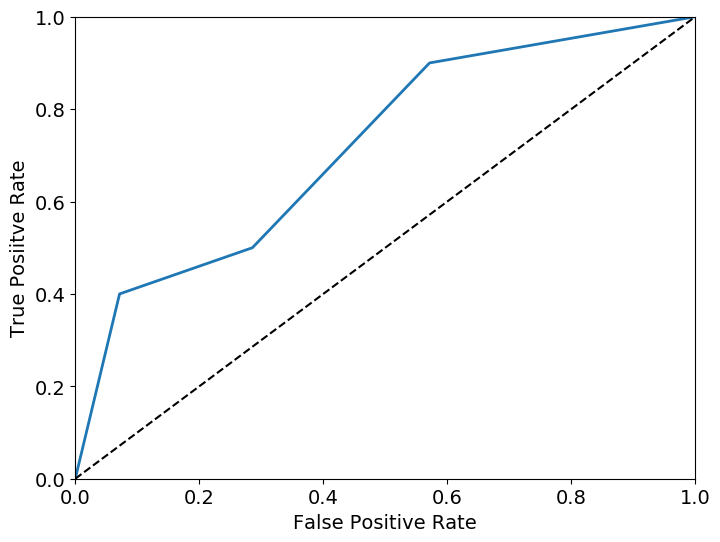

In [257]:
# Create a ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_proba[:,1])

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Posiitve Rate');

In [262]:
fpr, tpr, threshold

(array([0.        , 0.07142857, 0.28571429, 0.57142857, 1.        ]),
 array([0. , 0.4, 0.5, 0.9, 1. ]),
 array([1.57142857, 0.57142857, 0.42857143, 0.28571429, 0.14285714]))

In [258]:
# Calculate the area under the curve (AUC)
roc_auc_score(y_test, y_proba[:,1])

0.7178571428571429